<a href="https://colab.research.google.com/github/nikhilchint/Diabetic-Retinopathy/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries

# Building deep learning models
import tensorflow as tf 
from tensorflow import keras 
# For accessing pre-trained models
import tensorflow_hub as hub 
# For separating train and test sets
from sklearn.model_selection import train_test_split

# For visualizations
import matplotlib.pyplot as plt
import matplotlib.image as img
import PIL.Image as Image
import cv2

import os
import numpy as np
import pathlib

In [ ]:
data_dir = "/content/drive/MyDrive/colored_images/sorted_images" 
data="/content/drive/MyDrive/colored_images/colored_images"# Datasets path
data_dir = pathlib.Path(data_dir)
data_dir
data=pathlib.Path(data)

In [ ]:
mild = list(data_dir.glob('Mild/*'))[:2000]
moderate = list(data_dir.glob('Moderate/*'))[:2000]
no_dr = list(data.glob('No_DR/*'))[:2000]
proliferative_dr = list(data_dir.glob('Proliferate_DR/*'))[:2000]
severe = list(data_dir.glob('Severe/*'))[:2000]
print(len(mild))
print(len(moderate))
print(len(no_dr))
print(len(proliferative_dr))
print(len(severe))

2000
2000
2000
2000
2000


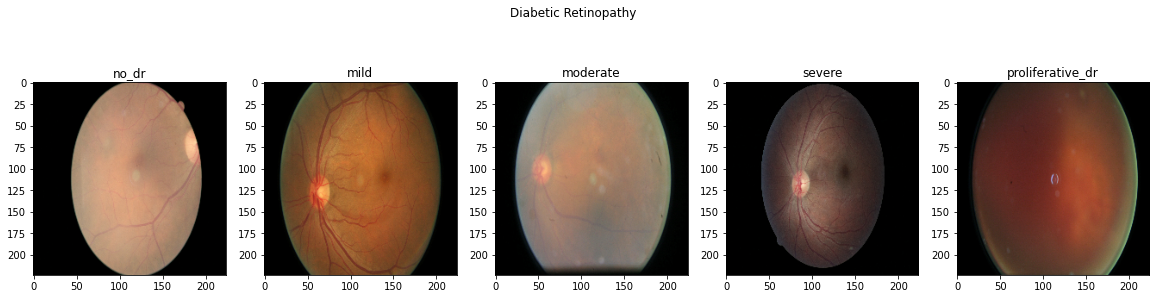

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Diabetic Retinopathy')
nodrimage = img.imread(no_dr[0])
mildimage = img.imread(mild[0])
moderateimage = img.imread(moderate[0])
severeimage = img.imread(severe[0])
proliferativeimage = img.imread(proliferative_dr[0])

ax[0].set_title('no_dr')
ax[1].set_title('mild')
ax[2].set_title('moderate')
ax[3].set_title('severe')
ax[4].set_title('proliferative_dr')


ax[0].imshow(nodrimage)
ax[1].imshow(mildimage)
ax[2].imshow(moderateimage)
ax[3].imshow(severeimage)
ax[4].imshow(proliferativeimage)

In [ ]:
# Contains the images path
df_images = {
    'no_dr':no_dr,
    'mild':mild,
    'moderate':moderate,
    'severe':severe,
    'proliferative_dr':proliferative_dr
}

# Contains numerical labels for the categories
df_labels = {
    'no_dr' : 0,
    'mild' : 1,
    'moderate' : 2,
    'severe' : 3,
    'proliferative_dr': 4
}

In [ ]:
X, y = [], [] # X = images, y = labels
for label, images in df_images.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (224, 224)) # Resizing the images to be able to pass on MobileNetv2 model
        X.append(resized_img) 
        y.append(df_labels[label])

In [ ]:
# Standarizing
X = np.array(X)
X = X/255
y = np.array(y)

In [ ]:
print(y)
print(len(y))

[0 0 0 ... 4 4 4]
3000


In [ ]:
# Separating data into training, test and validation sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y,test_size=0.2,random_state=True,shuffle=True)
# X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val)

In [ ]:
mobile_net = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4' # MobileNetv4 link
mobile_net = hub.KerasLayer(
        mobile_net, input_shape=(224,224, 3), trainable=False) # Removing the last layer

In [ ]:
num_label = 5 # number of labels

model_main = keras.Sequential([
    mobile_net,
    keras.layers.Dense(num_label)
])

model_main.summary()


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
model_chk = ModelCheckpoint("/content/drive/MyDrive/update/mobilnet_model.h5", save_best_only=True, monitor="val_accuracy")
reduce_lr = ReduceLROnPlateau()

In [ ]:
history = model.fit(X_train,y_train, epochs=150,validation_data=[X_val,y_val])

Epoch 1/30
75/75 [==============================] - ETA: 0s - loss: 1.5302 - acc: 0.3454

75/75 [==============================] - 436s 6s/step - loss: 1.5302 - acc: 0.3454 - val_loss: 1.7380 - val_acc: 0.2533
Epoch 2/30
75/75 [==============================] - ETA: 0s - loss: 1.2356 - acc: 0.4383

75/75 [==============================] - 427s 6s/step - loss: 1.2356 - acc: 0.4383 - val_loss: 2.4735 - val_acc: 0.2133
Epoch 3/30
75/75 [==============================] - ETA: 0s - loss: 1.1241 - acc: 0.4850

75/75 [==============================] - 427s 6s/step - loss: 1.1241 - acc: 0.4850 - val_loss: 1.4424 - val_acc: 0.4133
Epoch 4/30
75/75 [==============================] - ETA: 0s - loss: 1.0657 - acc: 0.5092

75/75 [==============================] - 436s 6s/step - loss: 1.0657 - acc: 0.5092 - val_loss: 1.2515 - val_acc: 0.4800
Epoch 5/30
75/75 [==============================] - ETA: 0s - loss: 0.9634 - acc: 0.5575

75/75 [==============================] - 433s 6s/step - loss: 0.9634 - acc: 0.5575 - val_loss: 1.5532 - val_acc: 0.4400
Epoch 6/30
75/75 [==============================] - ETA: 0s - loss: 0.9468 - acc: 0.5854

75/75 [==============================] - 430s 6s/step - loss: 0.9468 - acc: 0.5854 - val_loss: 2.5278 - val_acc: 0.2933
Epoch 7/30
75/75 [==============================] - ETA: 0s - loss: 0.8421 - acc: 0.6225

75/75 [==============================] - 430s 6s/step - loss: 0.8421 - acc: 0.6225 - val_loss: 1.2425 - val_acc: 0.5400
Epoch 8/30
75/75 [==============================] - ETA: 0s - loss: 0.7434 - acc: 0.6633

75/75 [==============================] - 426s 6s/step - loss: 0.7434 - acc: 0.6633 - val_loss: 1.8826 - val_acc: 0.4000
Epoch 9/30
75/75 [==============================] - ETA: 0s - loss: 0.6129 - acc: 0.7362

75/75 [==============================] - 422s 6s/step - loss: 0.6129 - acc: 0.7362 - val_loss: 1.6141 - val_acc: 0.3933
Epoch 10/30
75/75 [==============================] - ETA: 0s - loss: 0.6327 - acc: 0.7433

75/75 [==============================] - 425s 6s/step - loss: 0.6327 - acc: 0.7433 - val_loss: 1.6682 - val_acc: 0.4067
Epoch 11/30
75/75 [==============================] - ETA: 0s - loss: 0.5266 - acc: 0.7942

75/75 [==============================] - 427s 6s/step - loss: 0.5266 - acc: 0.7942 - val_loss: 1.8940 - val_acc: 0.4067
Epoch 12/30
75/75 [==============================] - ETA: 0s - loss: 0.4212 - acc: 0.8450

75/75 [==============================] - 428s 6s/step - loss: 0.4212 - acc: 0.8450 - val_loss: 4.2429 - val_acc: 0.3133
Epoch 13/30
75/75 [==============================] - ETA: 0s - loss: 0.3760 - acc: 0.8537

75/75 [==============================] - 431s 6s/step - loss: 0.3760 - acc: 0.8537 - val_loss: 1.8444 - val_acc: 0.4200
Epoch 14/30
75/75 [==============================] - ETA: 0s - loss: 0.2889 - acc: 0.8929

75/75 [==============================] - 426s 6s/step - loss: 0.2889 - acc: 0.8929 - val_loss: 2.6484 - val_acc: 0.4533
Epoch 15/30
75/75 [==============================] - ETA: 0s - loss: 0.3091 - acc: 0.8846

75/75 [==============================] - 423s 6s/step - loss: 0.3091 - acc: 0.8846 - val_loss: 2.6104 - val_acc: 0.3600
Epoch 16/30
75/75 [==============================] - ETA: 0s - loss: 0.3000 - acc: 0.8954

75/75 [==============================] - 423s 6s/step - loss: 0.3000 - acc: 0.8954 - val_loss: 2.1164 - val_acc: 0.5067
Epoch 17/30
75/75 [==============================] - ETA: 0s - loss: 0.2572 - acc: 0.9112

75/75 [==============================] - 425s 6s/step - loss: 0.2572 - acc: 0.9112 - val_loss: 3.6972 - val_acc: 0.3067
Epoch 18/30
75/75 [==============================] - ETA: 0s - loss: 0.1974 - acc: 0.9329

75/75 [==============================] - 424s 6s/step - loss: 0.1974 - acc: 0.9329 - val_loss: 2.0163 - val_acc: 0.5067
Epoch 19/30
75/75 [==============================] - ETA: 0s - loss: 0.2108 - acc: 0.9212

75/75 [==============================] - 427s 6s/step - loss: 0.2108 - acc: 0.9212 - val_loss: 2.2940 - val_acc: 0.4133
Epoch 20/30
75/75 [==============================] - ETA: 0s - loss: 0.2371 - acc: 0.9221

75/75 [==============================] - 423s 6s/step - loss: 0.2371 - acc: 0.9221 - val_loss: 1.8687 - val_acc: 0.5400
Epoch 21/30
75/75 [==============================] - ETA: 0s - loss: 0.1629 - acc: 0.9388

75/75 [==============================] - 423s 6s/step - loss: 0.1629 - acc: 0.9388 - val_loss: 3.5939 - val_acc: 0.4467
Epoch 22/30
 5/75 [=>............................] - ETA: 6:17 - loss: 0.1257 - acc: 0.9500

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
model.save("/content/drive/MyDrive/update/mobilnet_model.h5)

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/update/mobilnet_model.h5")